## Setup

In [1]:
from matplotlib.pyplot import rc
rc('figure', facecolor='white')

import qiskit as qk
from discopy import Ty, Box, Id, Functor


## **Exercise 1**

**Recipe:**

1. Bring a pot of water to a boil. Add pasta, cook until al dente, and then strain the pasta.

2. Heat olive oil over medium heat in a saute pan.
Add sliced garlic and cook until it begins to turn golden brown.

3. Add the pasta to the saute pan and toss until well coated.

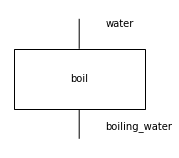

In [2]:
water, boiling_water = Ty('water'), Ty('boiling_water')

boil = Box('boil', dom=water, cod=boiling_water)
boil.draw(figsize=(2, 2))

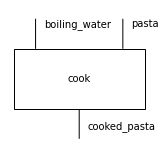

In [3]:
pasta, cooked_pasta = Ty('pasta'), Ty('cooked_pasta')

cook = Box('cook', dom=boiling_water @ pasta, cod=cooked_pasta)
cook.draw(figsize=(2, 2))

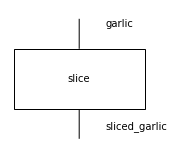

In [4]:
garlic, sliced_garlic = Ty('garlic'), Ty('sliced_garlic')

slice = Box('slice', dom=garlic, cod=sliced_garlic)
slice.draw(figsize=(2, 2))

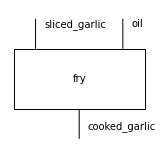

In [5]:
oil, cooked_garlic = Ty('oil'), Ty('cooked_garlic')

fry = Box('fry', dom=sliced_garlic @ oil, cod=cooked_garlic)
fry.draw(figsize=(2, 2))

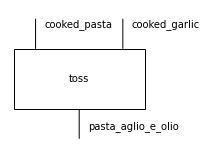

In [6]:
pasta_aglio_e_olio = Ty('pasta_aglio_e_olio')

toss = Box('toss', dom=cooked_pasta @ cooked_garlic, cod=pasta_aglio_e_olio)
toss.draw(figsize=(2, 2))

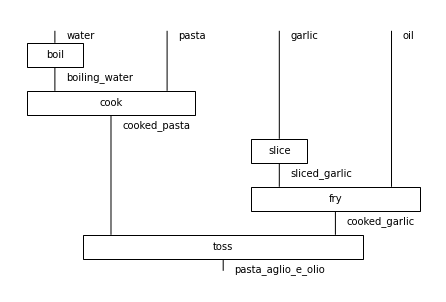

In [7]:
recipe = boil @ Id(pasta @ garlic @ oil) \
         >> cook @ slice @ Id(oil) \
         >> Id(cooked_pasta) @ fry \
         >> toss
recipe.draw()

## **Exercise 2**

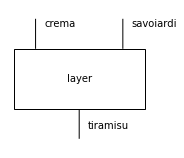

In [8]:
crema, savoiardi, tiramisu = Ty('crema'), Ty('savoiardi'), Ty('tiramisu')

layer = Box('layer', dom=crema @ savoiardi, cod=tiramisu)
layer.draw(figsize=(2, 2))

In [9]:
def tiramisu_n(n):
    """
    A function that returns the recipe of a tiramisu with n layers of crema di mascarpone and savoiardi.
    """
    crema, savoiardi, tiramisu = Ty('crema'), Ty('savoiardi'), Ty('tiramisu')
    domain = crema @ savoiardi
    for _ in range(n-1):
        domain = domain @ (crema @ savoiardi)
    return Box('layer', dom=domain, cod=tiramisu)

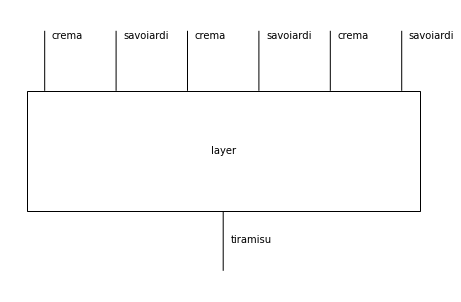

In [10]:
tiramisu_n(3).draw()

## **Exercise 3**

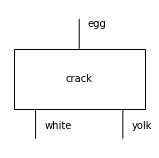

In [11]:
egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

crack = Box('crack', dom=egg, cod=white @ yolk)
crack.draw(figsize=(2, 2))

In [12]:
def crack_n(n):
    """
    A function that returns the recipe for cracking n eggs.
    """
    egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
    crack = Box('crack', dom=egg, cod=white @ yolk)
    recipe = crack
    for _ in range(n-1):
        recipe = recipe @ crack
    return recipe

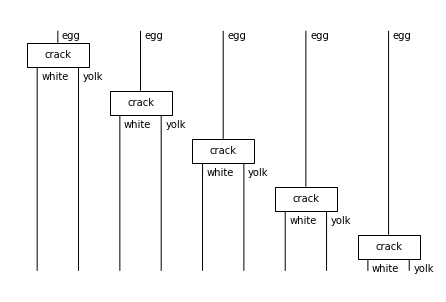

In [13]:
crack_n(5).draw()

## **Exercise 4**

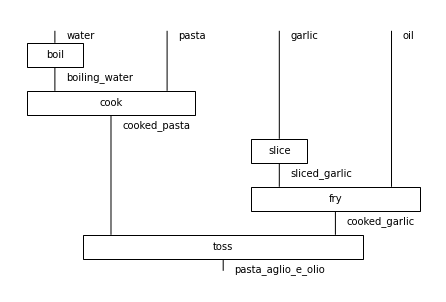

In [14]:
recipe.draw()

In [15]:
acqua, acqua_bollente = Ty('acqua'), Ty('acqua_bollente')
pasta_cotta = Ty('pasta_cotta')
aglio, aglio_affettato = Ty('aglio'), Ty('aglio_affettato')
olio, aglio_cotto = Ty('olio'), Ty('aglio_cotto')

bollire = Box('bollire', dom=acqua, cod=acqua_bollente)
cucinare = Box('cucinare', dom=acqua_bollente @ pasta, cod=pasta_cotta)
affettare = Box('affettare', dom=aglio, cod=aglio_affettato)
friggere = Box('friggere', dom=aglio_affettato @ olio, cod=aglio_cotto)
mescolare = Box('mescolare', dom=pasta_cotta @ aglio_cotto, cod=pasta_aglio_e_olio)

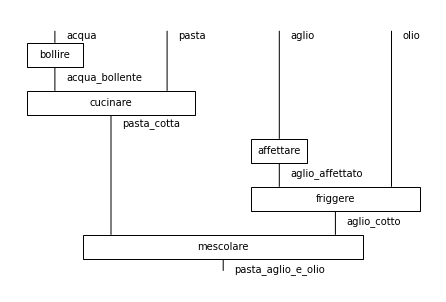

In [16]:
english2italian = Functor(
    ob={water: acqua,
        boiling_water: acqua_bollente,
        pasta: pasta,
        cooked_pasta: pasta_cotta,
        garlic: aglio,
        sliced_garlic: aglio_affettato,
        cooked_garlic: aglio_cotto,
        oil: olio},
    ar={boil: bollire,
        cook: cucinare,
        slice: affettare,
        fry: friggere,
        toss: mescolare}
)

english2italian(recipe).draw()

## **Exercise 5**

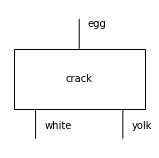

In [17]:
egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

crack = Box('crack', dom=egg, cod=white @ yolk)
crack.draw(figsize=(2, 2))

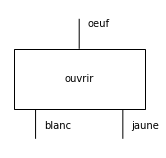

In [18]:
oeuf, blanc, jaune = Ty("oeuf"), Ty("blanc"), Ty("jaune")
ouvrir = Box("ouvrir", oeuf, blanc @ jaune)

english2french = Functor(
    ob={egg: oeuf,
        white: blanc,
        yolk: jaune},
    ar={crack: ouvrir}
)

english2french(crack).draw(figsize=(2, 2))

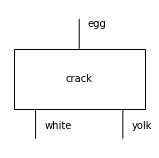

In [19]:
french2english = Functor(
    ob={oeuf: egg,
        blanc: white,
        jaune: yolk},
    ar={ouvrir: crack}
)

french2english(english2french(crack)).draw(figsize=(2, 2))

## **Exercise 6**

## **Exercise 7**

## **Exercise 8**

## **Exercise 9**

In [20]:
qk.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

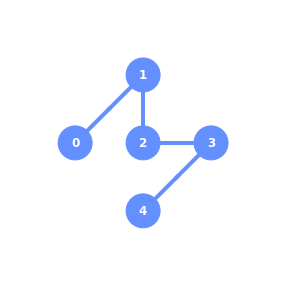

In [21]:
provider = qk.IBMQ.get_provider(hub="ibm-q-startup", group="opacity-quantum", project="testing")
backend = provider.get_backend('ibmq_bogota')

qk.visualization.plot_gate_map(backend);

In [22]:
bell = qk.QuantumCircuit(2)
bell.h(0)
bell.cnot(0, 1)
bell.measure_all()

bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [7]:
job = qk.execute(bell, backend, shots=8000)

print('Job ID: ' + job.job_id())
qk.tools.monitor.job_monitor(job)

counts = job.result().get_counts()

Job ID: 61080292c2c8560fecbbf478
Job Status: job is queued (2)     

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/thomassmith/git/CohortProject_2021/Week4_NLP/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/1t/_2vjqdgn6kldmlzs907knl_c0000gn/T/ipykernel_25318/4169008659.py", line 4, in <module>
    qk.tools.monitor.job_monitor(job)
  File "/Users/thomassmith/git/CohortProject_2021/Week4_NLP/venv/lib/python3.8/site-packages/qiskit/tools/monitor/job_monitor.py", line 89, in job_monitor
    _text_checker(
  File "/Users/thomassmith/git/CohortProject_2021/Week4_NLP/venv/lib/python3.8/site-packages/qiskit/tools/monitor/job_monitor.py", line 44, in _text_checker
    time.sleep(interval)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/thomassmith/git/CohortProject_2021/Week4_NLP/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2

TypeError: object of type 'NoneType' has no len()

In [ ]:
qk.visualization.plot_histogram(counts);

In [ ]:
provider = qk.IBMQ.get_provider(hub="ibm-q-startup", group="opacity-quantum", project="testing")
backend = provider.get_backend('ibmq_bogota')

qk.visualization.plot_gate_map(backend);

## **Exercise 10**

In [23]:
ghz = qk.QuantumCircuit(3)
ghz.h(0)
ghz.cnot(0, 1)
ghz.cnot(0, 2)
ghz.measure_all()

ghz.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

## **Exercise 11**

In [38]:
def ghz_n(n):
    """
    A function that takes returns a circuit for the n-qubit state.
    """
    circ = qk.QuantumCircuit(n)
    circ.h(0)
    for j in range(1, n):
        circ.cnot(0, j)
    circ.measure_all()
    return circ

In [39]:
ghz_n(5).draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4